# **Predicting Customer Churn in Kin Security**

## Part I - Define

**1. Business Understanding**

Kin Security is a security service company that offers a variety of products. Their star product 'Kin Safety' has been in the market since 2012 and has been a total success in European market. For this product, a client must sign a contract, pay the installation costs, and a monthly fee for the service. 

**2. Define the problem**

Clients who bought 'Kin Safety' product are canceling before two years so the Company is not being able to recover its investment because of its high fixed cost. The company wants to be able to predict which customers will stay less than two years so that they can construct commercial campaigns that benefit clients who will stay more and penalizes the ones who will not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Part II - DISCOVER

**3. Load the data**

In [2]:
#Defining the path for each dataset

clients_path = '../data/clients_table.txt'
credit_score_path = '../data/credit_score_table.txt'
products_path = '../data/products_table.txt'
transactions_path = '../data/transactions_table.txt'

In [3]:
#Loading data

clients = pd.read_csv(clients_path,sep=",")
scores = pd.read_csv(credit_score_path,sep=",")
products = pd.read_csv(products_path,sep=",")
transactions = pd.read_csv(transactions_path,sep=",")

In [4]:
# Let's take a look at the first rows in client dataset

clients.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.0,0.0,121219.28,2019-01-08,NaN,1980-08-03
2,14733224,PAWLUCH,Italy,Female,1.0,1.0,159663.59,2012-08-01,2013-08-09,1977-08-19
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
4,15365443,EBERLE,Italy,Male,1.0,0.0,35521.28,2014-01-26,2015-12-04,1972-12-21


In [5]:
#Let's inspect the dataset to find out how many rows and how many columns does it have.

clients.shape

(1545000, 10)

In [6]:
#Looking at the data types in our clients dataset

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545000 entries, 0 to 1544999
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   CustomerId        1545000 non-null  int64  
 1   Surname           1470084 non-null  object 
 2   Geography         1486541 non-null  object 
 3   Gender            1470114 non-null  object 
 4   HasCrCard         1470114 non-null  float64
 5   IsActiveMember    1470114 non-null  float64
 6   EstimatedSalary   1470114 non-null  float64
 7   application_date  1545000 non-null  object 
 8   exit_date         1054586 non-null  object 
 9   birth_date        1470114 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 117.9+ MB


In [7]:
#First rows in scores dataset

scores.head()

,CustomerId,Date,Score
0,14759722,2018-07,717
1,15907276,2011-09,562
2,15346641,2013-01,604
3,15595126,2018-08,469
4,15227788,2013-09,655


In [8]:
#First rows in Products dataset

products.head()

,ContractId,CustomerId,Products
0,5Xo9sCduOGo5EhBYhzKrSlLIA,14993808,Product B
1,3nQbqbnpTeSkYIJWT1UDe1GZ1,15560417,Product B
2,PD9KwDPOwyJWO6LJKPGBbkrCz,15406428,Product C
3,IhS7pz8lu07LCZSqYNlL0fuLP,15604313,Product B
4,ftUey4oVmkZj8RaBVFH6SNzVM,14952409,Product C


In [9]:
#First rows in Transactions dataset

transactions.head()

,CustomerId,Transaction,Value
0,15653320,trans_4,-294.03
1,14955663,trans_3,1297.97
2,15218505,trans_4,191.28
3,15391934,trans_3,2299.07
4,14847291,trans_3,1612.10


**4. Clean the data**

### **Clean Client Database** : 
We will apply filters to the Clients database to find the final desired population.

**a. Contracts from 2015 onwards**

In [10]:
mod_a = clients[clients['application_date'] >= '2015-01-01']
mod_a.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
1,14990118,MOLOCK,Italy,Male,1.0,0.0,121219.28,2019-01-08,NaN,1980-08-03
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
5,15638124,BRASHERS,Italy,Female,0.0,0.0,170661.45,2018-02-23,NaN,1983-01-13
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30


In [11]:
mod_a.shape

(623242, 10)

**b. Operations in Italy were closed this year (2019)**

   (We won't be interested in Italy as there will not be an office in that country anymore)

In [12]:
mod_b = mod_a[(mod_a['Geography'] != 'Italy')]
mod_b.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11
15,14611239,DOKKA,France,Male,0.0,1.0,72210.60,2019-02-24,NaN,1986-04-26


In [13]:
mod_b.shape

(487424, 10)

**c. Take out clients with more than 75% of their info missing.**

In [14]:
# Delete rows containing either 75% or more than 75% NaN Values

perc = 75
min_count =  int(((100-perc)/100)*mod_b.shape[1] + 1)
mod_c = mod_b.dropna( axis=0, 
                    thresh=min_count)

mod_c.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11
15,14611239,DOKKA,France,Male,0.0,1.0,72210.60,2019-02-24,NaN,1986-04-26


In [15]:
mod_c.shape

(468773, 10)

**d. Each client should only have one contract in the database, no more.**

In [16]:
mod_d = mod_c.drop_duplicates(['CustomerId']).copy()
mod_d.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,NaN,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,NaN,1979-02-27
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11
15,14611239,DOKKA,France,Male,0.0,1.0,72210.60,2019-02-24,NaN,1986-04-26


In [17]:
mod_d.shape

(455128, 10)

**e. Remember that for a client to be eligible, it must have at least two years of imformation within the company (even if it canceled the product)**

In [18]:
#As there are clients that have not cancelled , their exit_date in Nan, so we will pretend that their exit_date
#is today's date, to avoid error messages when calculating the number of days.

today = '2019-11-30'
mod_d['exit_date'] = mod_d['exit_date'].replace(np.nan, today).copy()
mod_d.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,2019-11-30,1997-09-18
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,2019-11-30,1979-02-27
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11
15,14611239,DOKKA,France,Male,0.0,1.0,72210.60,2019-02-24,2019-11-30,1986-04-26


In [19]:
#For a better undersating of the number of days calculation we will add temporarily a column with the difference in days 
#between application_date and exit_date.

mod_d[['application_date','exit_date']] = mod_d[['application_date','exit_date']].apply(pd.to_datetime).copy()
mod_d['days_in_company'] = (mod_d['exit_date'] - mod_d['application_date']).dt.days
mod_d.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,days_in_company
0,15745584,EIRLS,Germany,Female,0.0,1.0,0.00,2018-12-14,2019-11-30,1997-09-18,351
3,14648573,NALLS,Spain,Male,1.0,0.0,140827.98,2019-06-19,2019-11-30,1979-02-27,164
7,14523468,LASKOSKI,Spain,Female,1.0,0.0,158161.23,2017-12-28,2018-11-19,1972-10-30,326
14,15165393,LABIANCA,Spain,Male,1.0,1.0,2612.65,2018-02-22,2019-06-11,1974-07-11,474
15,14611239,DOKKA,France,Male,0.0,1.0,72210.60,2019-02-24,2019-11-30,1986-04-26,279


In [20]:
mod_e = mod_d[mod_d['days_in_company'] >= 730]
mod_e.head()

,CustomerId,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,days_in_company
75,15610711,Eluemuno,Germany,Female,0.0,0.0,167673.37,2017-03-05,2019-11-27,1976-10-21,997
484,15594720,Scott,Germany,Female,1.0,1.0,189339.60,2017-11-08,2019-11-30,1982-05-14,752
901,15706552,Odinakachukwu,France,Male,0.0,1.0,156731.91,2016-02-15,2019-10-02,1979-09-09,1325
1440,15594084,Anderson,France,Male,1.0,0.0,74405.34,2016-03-17,2019-09-07,1993-06-08,1269
1543,15756871,Capon,Spain,Male,1.0,0.0,134878.19,2015-05-20,2018-04-29,1976-04-20,1075


In [21]:
mod_e.shape

(7963, 11)

In [22]:
mod_e = mod_e.drop('days_in_company', axis=1).copy()

In [23]:
mod_e.shape

(7963, 10)

In [24]:
desired_population = mod_e.set_index('CustomerId')
desired_population.head()

,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date
CustomerId,,,,,,,,,
15610711,Eluemuno,Germany,Female,0.0,0.0,167673.37,2017-03-05,2019-11-27,1976-10-21
15594720,Scott,Germany,Female,1.0,1.0,189339.60,2017-11-08,2019-11-30,1982-05-14
15706552,Odinakachukwu,France,Male,0.0,1.0,156731.91,2016-02-15,2019-10-02,1979-09-09
15594084,Anderson,France,Male,1.0,0.0,74405.34,2016-03-17,2019-09-07,1993-06-08
15756871,Capon,Spain,Male,1.0,0.0,134878.19,2015-05-20,2018-04-29,1976-04-20


So far, our desired population has now 7,963 clients

### **Obtain relevant variables:** 
We will now use the different datasets to find the following variables and append them to the Clients dataset

**a. Products dataset ---> Number of products per client at the moment of application**

In [26]:
#Obtaining number of products per client in a variable
products_per_client = products['CustomerId'].value_counts()

In [27]:
#Converting to a dataframe 
products_per_client_df = pd.DataFrame(data=products_per_client)

In [28]:
products_per_client_df = products_per_client_df.loc[desired_population.index,:]
products_per_client_df = products_per_client_df.rename(columns={'CustomerId' : 'Num_of_Products'})

In [29]:
#Let's verify that the number of rows in our new products_per_client dataframe matches the number of rows in our desired_population
products_per_client_df.shape

(7963, 1)

**b. Transactions dataset ---> Balance in the bank account at the moment of application**

In [30]:
# Putting balance of transactions per client into a variable
balance = transactions.groupby(['CustomerId'])[['Value']].sum()

In [31]:
#Convert balance variable into a dataframe
balance_df = pd.DataFrame(data=balance)

In [32]:
balance_df = balance_df.loc[desired_population.index,:]
balance_df = balance_df.rename(columns={'Value' : 'Balance'})

In [33]:
#Verifying that the number of rows in our new balance dataframe matches the number of rows in our modified_filetered_clients.
balance_df.shape

(7963, 1)

**c. Credit Scores dataset ---> Score of the credit bureau at the moment of application. Consider it is a monthly score**

In [34]:
desired_population['app_year-month'] = desired_population['application_date'].dt.strftime('%Y-%m')

In [35]:
app_period = pd.DataFrame(desired_population['app_year-month'])

In [36]:
app_period.head()

,app_year-month
CustomerId,
15610711,2017-03
15594720,2017-11
15706552,2016-02
15594084,2016-03
15756871,2015-05


In [37]:
app_period.shape

(7963, 1)

In [38]:
scores = scores.set_index('CustomerId')
scores = scores.loc[desired_population.index, :]

In [39]:
scores.head()

,Date,Score
CustomerId,,
15610711,2016-09,738
15610711,2017-07,689
15610711,2017-06,651
15610711,2016-10,636
15610711,2017-09,606


In [40]:
#Let's define a function so that using our app_period dataframe we can get the score of each customer only for the application period.

def get_the_score(row):
    score_by_id = scores[scores.index == row.name]
    score_by_period = score_by_id[(score_by_id['Date'] == row['app_year-month'])]
    return score_by_period['Score'].values[0]

In [41]:
score = app_period.apply(get_the_score, axis=1,)

In [42]:
score_df = pd.DataFrame(score)
score_df = score_df.rename(columns={0 : 'Score'})

In [43]:
score_df.head()

,Score
CustomerId,
15610711,678
15594720,460
15706552,533
15594084,524
15756871,512


In [44]:
score_df.shape

(7963, 1)

In [45]:
#Do not forget to drop the additional column we created for matching purposes in our main dataframe (desired_puopulation).
desired_population = desired_population.drop('app_year-month', axis=1).copy()

**d. Clients dataset ---> Age of the client at the moment of application**

As we have already converted our clients dataset in our desired population, we will create a new column in our desired population dataframe.

In [46]:
desired_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7963 entries, 15610711 to 15601172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Surname           7963 non-null   object        
 1   Geography         7963 non-null   object        
 2   Gender            7963 non-null   object        
 3   HasCrCard         7963 non-null   float64       
 4   IsActiveMember    7963 non-null   float64       
 5   EstimatedSalary   7963 non-null   float64       
 6   application_date  7963 non-null   datetime64[ns]
 7   exit_date         7963 non-null   datetime64[ns]
 8   birth_date        7963 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 622.1+ KB


In [47]:
# We need to convert our birth_date column into a datetime type
desired_population['birth_date'] = desired_population['birth_date'].apply(pd.to_datetime).copy()

In [48]:
# Let's get the difference in number of days between birth_date and application_date
desired_population['age_by_application'] = (desired_population['application_date'] - desired_population['birth_date']).dt.days

In [49]:
#Now let's get the age (when client bought the product)
desired_population['age_by_application'] = (desired_population['age_by_application']/365)

In [50]:
desired_population['age_by_application'] = desired_population['age_by_application'].astype(int)

In [51]:
desired_population.head()

,Surname,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,application_date,exit_date,birth_date,age_by_application
CustomerId,,,,,,,,,,
15610711,Eluemuno,Germany,Female,0.0,0.0,167673.37,2017-03-05,2019-11-27,1976-10-21,40
15594720,Scott,Germany,Female,1.0,1.0,189339.60,2017-11-08,2019-11-30,1982-05-14,35
15706552,Odinakachukwu,France,Male,0.0,1.0,156731.91,2016-02-15,2019-10-02,1979-09-09,36
15594084,Anderson,France,Male,1.0,0.0,74405.34,2016-03-17,2019-09-07,1993-06-08,22
15756871,Capon,Spain,Male,1.0,0.0,134878.19,2015-05-20,2018-04-29,1976-04-20,39


**5. Exploratory Data Analysis**

**Joining clean data and new variables**

In [52]:
concat_data = pd.concat([desired_population, products_per_client_df, balance_df, score_df], axis=1, join ='inner')

In [53]:
#Drop columns that will not be helpful for Modeling.Some of them have already been useful for new variable creation.
concat_data = concat_data.drop(labels = ['Surname','application_date', 'exit_date', 'birth_date'], axis=1).copy()

In [54]:
concat_data.head()

,Geography,Gender,HasCrCard,IsActiveMember,EstimatedSalary,age_by_application,Num_of_Products,Balance,Score
CustomerId,,,,,,,,,
15610711,Germany,Female,0.0,0.0,167673.37,40,1,1.286445e+05,678
15594720,Germany,Female,1.0,1.0,189339.60,35,2,1.027429e+05,460
15706552,France,Male,0.0,1.0,156731.91,36,1,8.531170e+04,533
15594084,France,Male,1.0,0.0,74405.34,22,2,4.547474e-13,524
15756871,Spain,Male,1.0,0.0,134878.19,39,1,0.000000e+00,512


**Descriptive Statistics**

In [55]:
concat_data.describe()

,HasCrCard,IsActiveMember,EstimatedSalary,age_by_application,Num_of_Products,Balance,Score
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7.963000e+03,7963.000000
mean,0.707146,0.554565,99738.391772,37.408640,1.544267,7.274530e+04,651.853196
std,0.455101,0.497045,57405.586966,10.126333,0.509536,6.284804e+04,95.653837
min,0.000000,0.000000,90.070000,18.000000,1.000000,-1.477929e-12,405.000000
25%,0.000000,0.000000,50783.490000,31.000000,1.000000,0.000000e+00,585.000000
50%,1.000000,1.000000,99645.040000,36.000000,2.000000,9.207268e+04,653.000000
75%,1.000000,1.000000,148609.955000,41.000000,2.000000,1.264103e+05,718.000000
max,1.000000,1.000000,199992.480000,92.000000,3.000000,2.215328e+05,850.000000


According to the statistics, all the numerical variables seem logical. There is only one column that seems to have outliers. It is EstimatedSalary as the minimum number is 90 while its mean number is 99,738. It is a feature that we should also consider normalizing to have a better model performance. 

In [56]:
concat_data['Balance'] = concat_data['Balance'].astype(int)

In [57]:
#Let's separate our features from our target variable.
target = concat_data['IsActiveMember']
features = concat_data.drop('IsActiveMember', axis=1).copy()

**Analizing Suspected Outliers**

In [58]:
#We will begin by solving the outliers in 'EstimatedSalary'
stat= features['EstimatedSalary'].describe()

IQR = stat['75%']-stat['25%']
upper = stat['75%'] + 1.5*IQR
lower = stat['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper.round(),lower.round()))

The upper & lower bounds for suspected outliers are 295350.0 and -95956.0.


Text(0.5, 1.0, 'Looking for outliers in Estimated Salary')

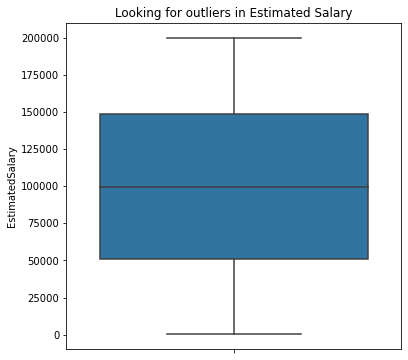

In [59]:
plt.figure(figsize=(6,6))
sns.boxplot(y= features['EstimatedSalary'])
plt.title('Looking for outliers in Estimated Salary')


According to this bounds using the IQR, the values we considered outliers should NOT be eliminated.

**Distribution of Active Members**

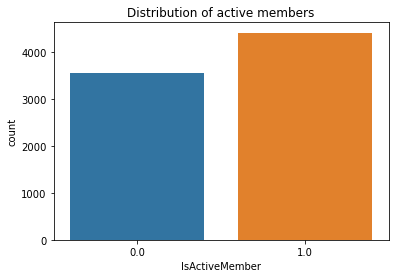

In [60]:
#Let's first visualize the distribution of our target variable.

sns.countplot(x=target)
plt.title('Distribution of active members')
plt.show()

As we can see there are no unknow values. And it is a balanced dataset.

**Categorical Variables**

In [61]:
def countplot_feature_vs_isactive(var,y):
    fig = plt.figure(figsize=(10,6))
    plot=sns.countplot(x=var,data=features,hue=y)
    plt.show()

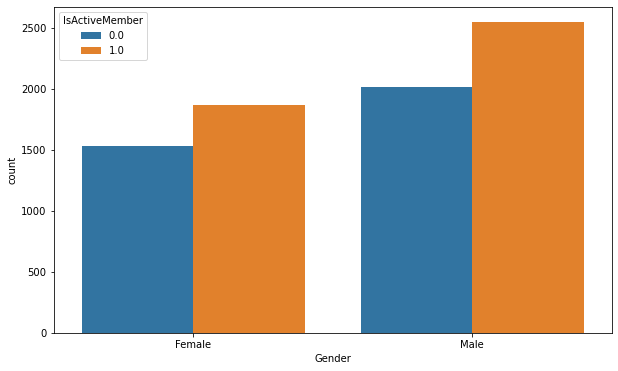

In [62]:
#Let's see the distribution of active members in men and women.
countplot_feature_vs_isactive('Gender', target)

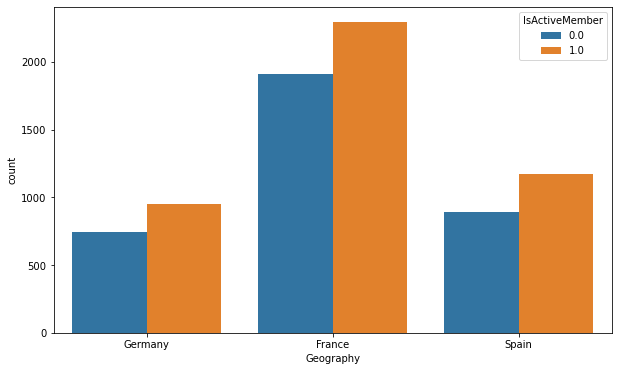

In [63]:
#Let's see the distribution of active members in each country where we have operations.
countplot_feature_vs_isactive('Geography', target)

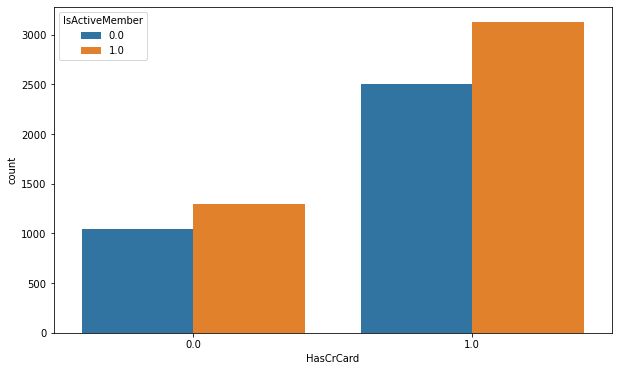

In [64]:
#Let's see the distribution of active members in people who have a crecit card and the one who don't.
countplot_feature_vs_isactive('HasCrCard', target)

**Numerical Variables**

Finally to keep it concise, we will only visualize the numerical variables by adding them to a heatmap

In [65]:
num_cols = features.select_dtypes(['int', 'float']).columns

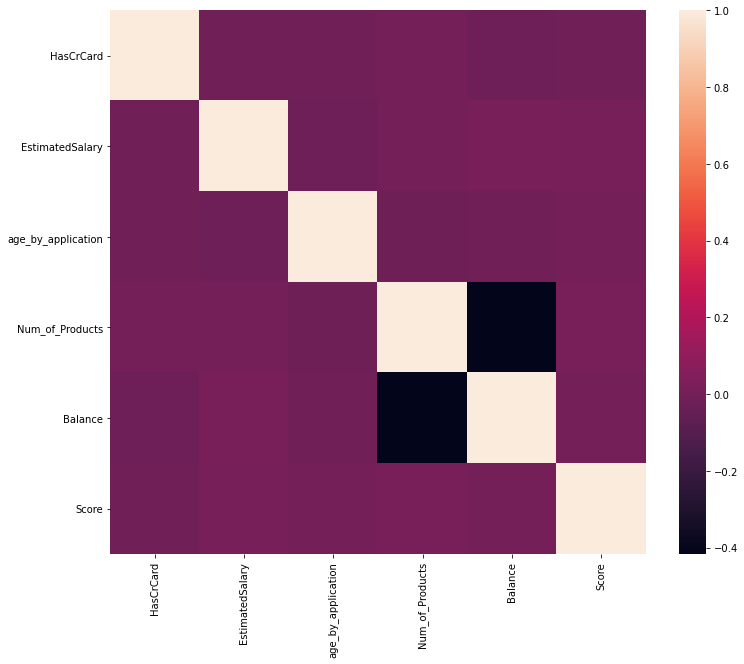

In [66]:
fig = plt.figure(figsize=(12,10))
cor_matrix = pd.concat([features[num_cols]], axis = 1).corr()
sns.heatmap(cor_matrix)
plt.show()

We can see there is a strong negative relation between Balance and Number of Products per client (both at the moment of application), which means the more money client had on its bank account at the moment of application, the less products client had.

**Encoding Geography and Gender**

In [67]:
features = pd.get_dummies(features, columns = ['Geography', 'Gender'])

**Feature Scaling for a better model performance**

In [68]:
scaled_df = features.copy()
  
# apply normalization techniques by Column 
column1 = 'EstimatedSalary'
scaled_df[column1] = (scaled_df[column1] - scaled_df[column1].min()) / (scaled_df[column1].max() - scaled_df[column1].min())    
  
column2 = 'Balance'
scaled_df[column2] = (scaled_df[column2] - scaled_df[column2].min()) / (scaled_df[column2].max() - scaled_df[column2].min())    

column3 = 'Score'
scaled_df[column3] = (scaled_df[column3] - scaled_df[column3].min()) / (scaled_df[column3].max() - scaled_df[column3].min())

column4 = 'age_by_application'
scaled_df[column4] = (scaled_df[column4] - scaled_df[column4].min()) / (scaled_df[column4].max() - scaled_df[column4].min())

# view normalized data
display(scaled_df)

,HasCrCard,EstimatedSalary,age_by_application,Num_of_Products,Balance,Score,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,
15610711,0.0,0.838326,0.297297,1,0.580702,0.613483,0,1,0,1,0
15594720,1.0,0.946710,0.229730,2,0.463779,0.123596,0,1,0,1,0
15706552,0.0,0.783592,0.243243,1,0.385096,0.287640,1,0,0,0,1
15594084,1.0,0.371758,0.054054,2,0.000000,0.267416,1,0,0,0,1
15756871,1.0,0.674270,0.283784,1,0.000000,0.240449,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
15613180,1.0,0.816427,0.040541,1,0.692198,0.723596,0,1,0,0,1
15689152,0.0,0.076481,0.270270,1,0.569453,0.624719,0,0,1,0,1
15787204,0.0,0.543836,0.337838,1,0.499458,0.829213,0,0,1,1,0


In [71]:
scaled_df.head()

,HasCrCard,EstimatedSalary,age_by_application,Num_of_Products,Balance,Score,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,
15610711,0.0,0.838326,0.297297,1,0.580702,0.613483,0,1,0,1,0
15594720,1.0,0.946710,0.229730,2,0.463779,0.123596,0,1,0,1,0
15706552,0.0,0.783592,0.243243,1,0.385096,0.287640,1,0,0,0,1
15594084,1.0,0.371758,0.054054,2,0.000000,0.267416,1,0,0,0,1
15756871,1.0,0.674270,0.283784,1,0.000000,0.240449,0,0,1,0,1


## Part III - DEVELOP

In [73]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC

In [74]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target ,test_size=0.30, random_state = 1)

**What metric am I going to use?**

I decided to focus on Precision and Call.

**Precision** is the % of all churn that the model correctly identifies
**Recall** is the % of identified churn that actually ends up churning

These evaluate false positives, which lead to unnecessary and costly churn prevention efforts, and false negatives, which lead to companies churning without being identified.



**Baseline model I: Logistic Regression**

In [75]:
#Logistic Regression model

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
X_test_lr = X_test
lr_predictions = lr.predict(X_test_lr)

In [77]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, lr_predictions))

Accuracy: 0.5454164922561742


In [78]:
#Classification report
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

         0.0       0.48      0.29      0.36      1062
         1.0       0.57      0.75      0.65      1327

    accuracy                           0.55      2389
   macro avg       0.52      0.52      0.50      2389
weighted avg       0.53      0.55      0.52      2389



**Baseline Model II: Random Forest**

In [103]:
clf=RandomForestClassifier(n_estimators = 10, random_state = 42)

In [104]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [105]:
#Making predictions
X_test_clf = X_test
clf_predictions = clf.predict(X_test_clf)

In [106]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf_predictions))

Accuracy: 0.5403934700711595


In [107]:
#Classification report
print(classification_report(y_test, clf_predictions))

              precision    recall  f1-score   support

         0.0       0.49      0.58      0.53      1062
         1.0       0.60      0.50      0.55      1327

    accuracy                           0.54      2389
   macro avg       0.54      0.54      0.54      2389
weighted avg       0.55      0.54      0.54      2389



**Baseline Model III: XGBoost Model**

In [108]:
#XGBoost model

 '''
 xgb = XGBClassifier(learning_rate =0.5,
 n_estimators=1000,
 max_depth=5,min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)'''



[0.08953695 0.10084388 0.10879522 0.08865972 0.10208606 0.08560492
 0.07446289 0.09772336 0.10051935 0.06547914 0.08628855]


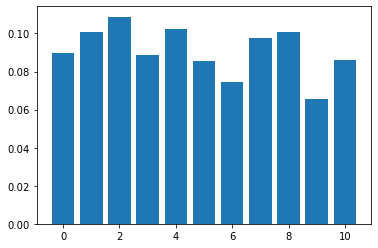

In [113]:
from matplotlib import pyplot

# feature importance
print(xgb.feature_importances_)
# plot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

According to these graph the three most important features for prediction are Estimated Salary, Age at the moment of application, and balance in the bank account at the moment of application.

We can additionally use the most important features to filter the features that go into our model. 